<p> Correlation change Analysis </p>

<ul>
    <li>find whether there's a link/correlation between trend of incident before the change and trend of incident after the change </li>
    <li>whether the change implemented causes any stability issues that causes an increase in incident </li>
</ul>

<p>Based on the link given :  https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce</p>
<ul> 
    <li>it proposed to analyze the probability distribution of time series of incident before and after the change (before incident raised & after incident raised) and see if the distributions are the same</li>
</ul>


<p> Algorithm To research on : n-neighbour </p> 

In [1]:
from datetime import datetime as dt
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd 
from csv import reader
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
class openfile():
    def __init__(self, fileurl):    
        self.data = fileurl
        self.opened_file = open(fileurl)
        self.read_file = reader(self.opened_file)
        self.result = list(self.read_file)
        
        dataframe =  pd.DataFrame(self.result)
        header = dataframe.iloc[0] 
        content = dataframe[1:]
        self.df = content.rename(columns=header) 

In [3]:
# Load data to table
file = openfile('../raw_data/inc_trend.csv')
load_data = file.result # Result is as list 

#convert date string to date
for i in load_data[1:]:
    i[2] = dt.strptime(i[2],'%m/%d/%Y').date()
    i[3] = dt.strptime(i[3],'%m/%d/%Y').date()
    i[5] = dt.strptime(i[5],'%m/%d/%Y').date()
    i[6] = dt.strptime(i[6],'%m/%d/%Y').date()
    
    #convert to int to find if there is any correlation between trends 
    i[4] = int(i[4])
    i[-1] = int(i[-1])
    

,﻿appid,chg_number,chg_start,dates_bfr_5,inc_cnt_bfr,chg_end_date,dates_aft_5,inc_cnt_aft
1,1,123,2020-01-15,2020-01-10,20,2020-01-17,2020-01-18,70
2,1,123,2020-01-15,2020-01-11,22,2020-01-17,2020-01-19,30
3,1,123,2020-01-15,2020-01-12,14,2020-01-17,2020-01-20,2
4,1,123,2020-01-15,2020-01-13,23,2020-01-17,2020-01-21,9
5,1,123,2020-01-15,2020-01-14,34,2020-01-17,2020-01-22,0


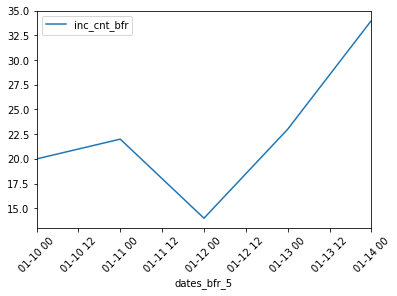

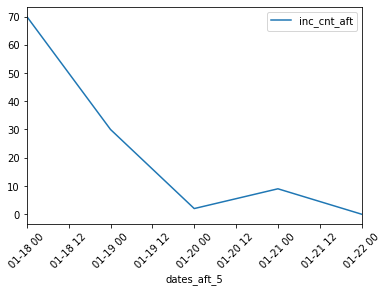

In [42]:
#Converting list to frame
header = pd.DataFrame(load_data).iloc[0]
content = pd.DataFrame(load_data)[1:]
df = content.rename(columns=header)


# df

df_bfr = df.filter(['dates_bfr_5','inc_cnt_bfr'],axis=1)
df_afr = df.filter(['dates_aft_5','inc_cnt_aft'],axis=1)

df1 = df_bfr.set_index('dates_bfr_5').plot()
plt.xticks(rotation=45)

df2 = df_afr.set_index('dates_aft_5').plot()
plt.xticks(rotation=45)

df
# df_bft_after = df['dates_aft_5','inc_cnt_aft']

In [5]:
df_chg = np.array(df['inc_cnt_bfr'])
df_aft = np.array(df['inc_cnt_aft'])
scatter.plot

In [43]:
#Method is not correct 
x = np.array(df_aft)
y = np.array(df_chg)
r, p = scipy.stats.pearsonr(x, y)

# plt.scatter(df['dates_bfr_5'],x)
# plt.show()

 Remarks : Values should be discreet and we know the number of incident raised - Unsure if its discreet or continues 
 
 Lets find correlation for 1 software that is assigned to 1 change number and find the probabilitt distribution

<B> N-Neighbour Definition and use case </B>
<p> n neigbours is from sklearn.neighbors.NearestNeighbors </p>
Reference : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

- Unsupervise learning : Nearest Neigbour

In [33]:
from scipy.spatial.distance import correlation
from sklearn.neighbors import NearestNeighbors
import seaborn as sn

In [34]:
# find the average 10 days before and 10 days after -> one dataset
# Default n_neigbours = 2

trend = [df_chg, df_aft]
nbrs = NearestNeighbors(n_neighbors=2, metric='correlation')
nbrs.fit(trend)
# graph = nbrs.kneighbors_graph(trend)
# sn.heatmap(graph, annot = True)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='correlation',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [44]:
#HeatMap